In [1]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
companies = pd.read_csv('/content/sp500_companies.csv')

In [16]:
companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [3]:
companies.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,502.000000,5.020000e+02,4.730000e+02,499.000000,4.930000e+02,502.000000
mean,217.893685,1.107222e+11,7.045286e+09,0.070541,5.782761e+04,0.001992
std,489.205027,3.440074e+11,1.624213e+10,0.180247,1.395988e+05,0.006189
min,9.400000,4.664099e+09,-3.991000e+09,-0.602000,2.800000e+01,0.000084
25%,68.547500,1.933417e+10,1.625000e+09,0.002000,1.020000e+04,0.000348
50%,118.365000,3.706396e+10,2.952748e+09,0.051000,2.169000e+04,0.000667
75%,227.667500,7.830565e+10,6.020000e+09,0.109000,5.510000e+04,0.001409
max,8276.780000,3.846820e+12,1.495470e+11,1.632000,2.100000e+06,0.069209


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             502 non-null    object 
 1   Symbol               502 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             502 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            502 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 502 non-null    object 
 11  State                482 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15  Weight               502 non-null    flo

In [5]:
companies.isnull().sum()

,0
Exchange,0
Symbol,0
Shortname,0
Longname,0
Sector,0
Industry,0
Currentprice,0
Marketcap,0
Ebitda,29
Revenuegrowth,3


In [6]:
companies.replace('null', pd.NA, inplace=True)

In [7]:
numeric_cols = companies.select_dtypes(include='number').columns
companies[numeric_cols] = companies[numeric_cols].fillna(companies[numeric_cols].mean())

In [8]:
companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [9]:
Q1 = companies[numeric_cols].quantile(0.25)
Q3 = companies[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
outliers_mask = ((companies[numeric_cols] < lower_bound) | (companies[numeric_cols] > upper_bound))

In [13]:
outliers_count = outliers_mask.sum()

In [14]:
outliers_count

,0
Currentprice,43
Marketcap,57
Ebitda,35
Revenuegrowth,42
Fulltimeemployees,45
Weight,57


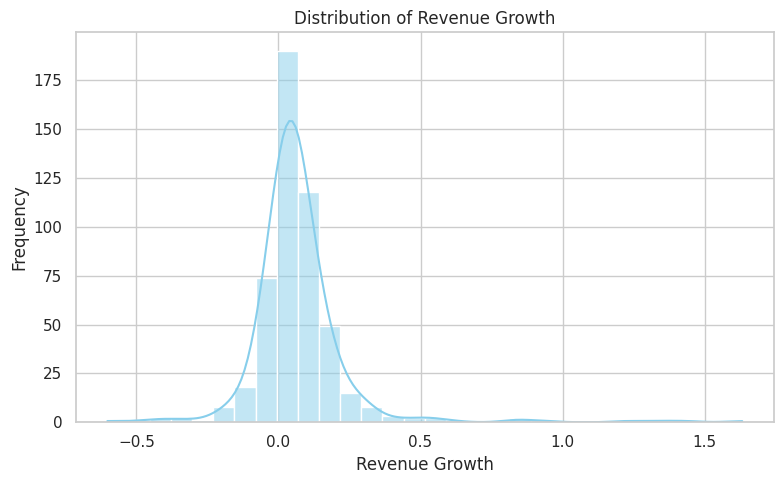

<ipython-input-20-80535ae4f7c3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_marketcap_sector.values, y=avg_marketcap_sector.index, palette="viridis")


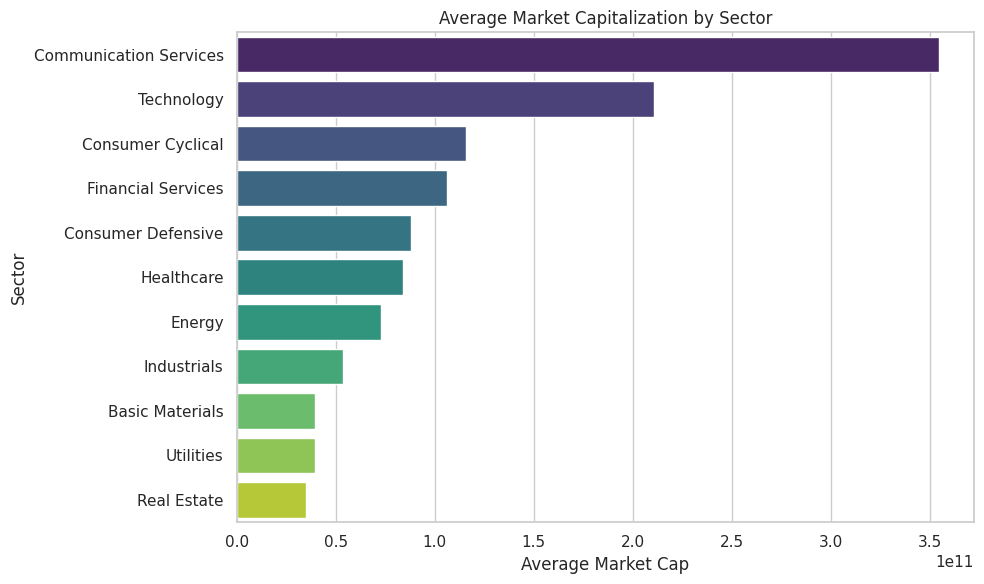

<ipython-input-20-80535ae4f7c3>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revgrowth_sector.values, y=avg_revgrowth_sector.index, palette="rocket")


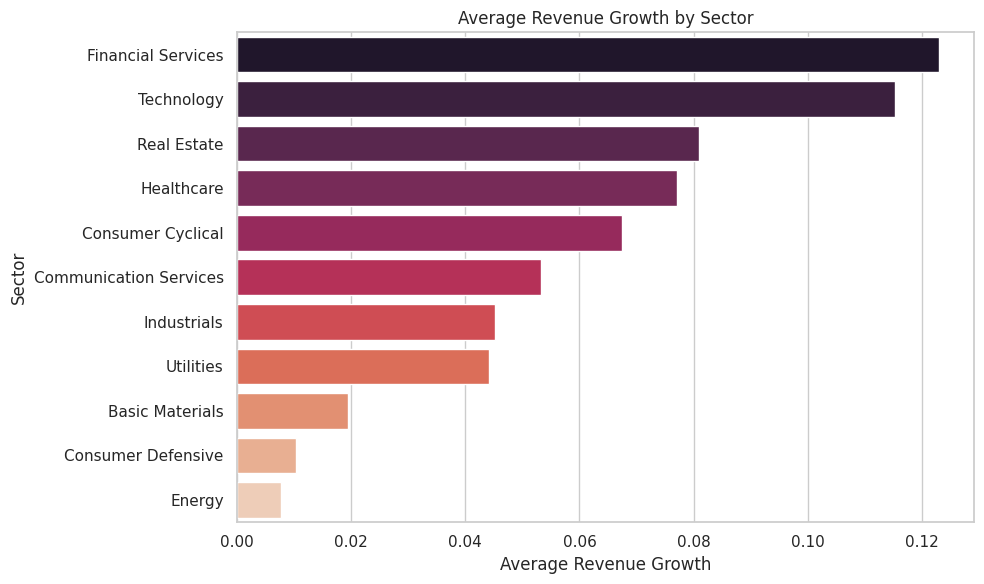

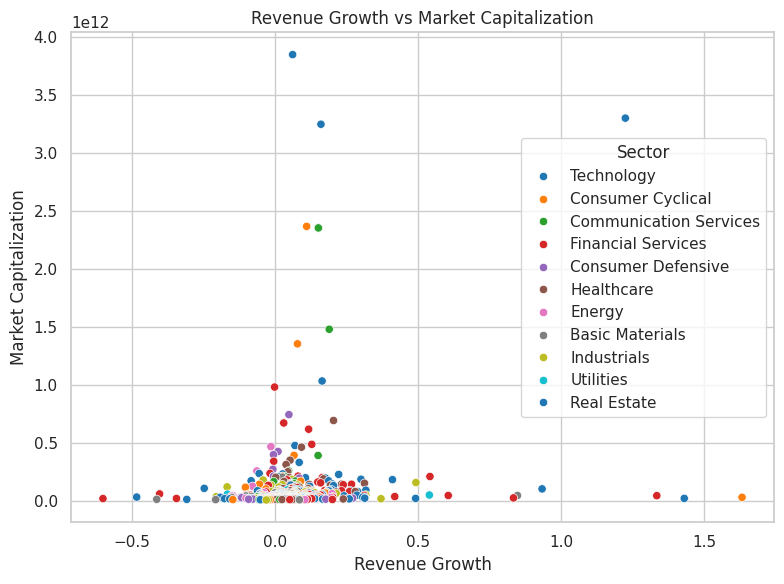

<ipython-input-20-80535ae4f7c3>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=companies, x="Sector", y="Marketcap", palette="Set2")


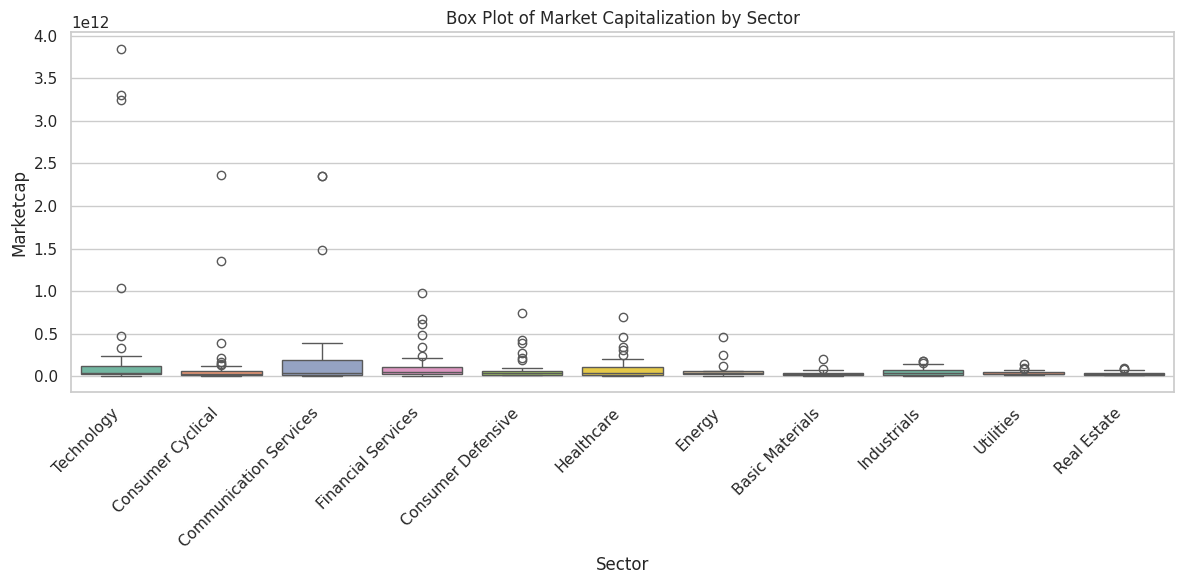

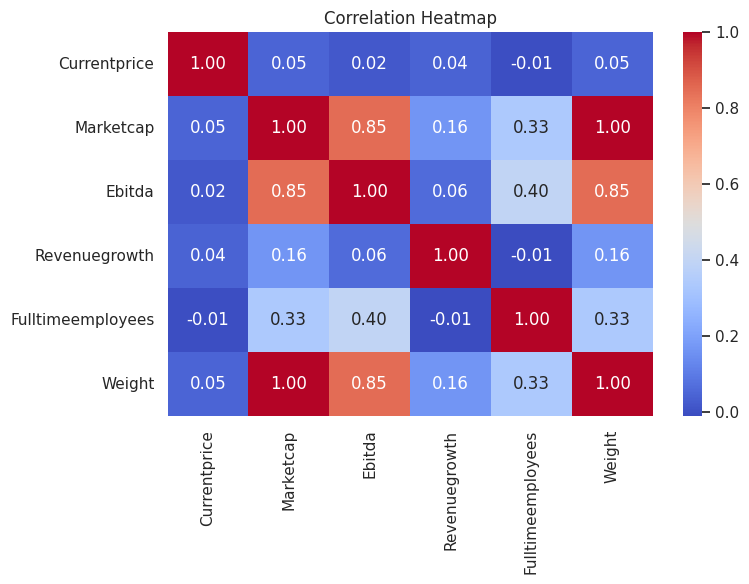

In [20]:
# Set seaborn style
sns.set(style="whitegrid")

# 1. Distribution of Revenue Growth
plt.figure(figsize=(8, 5))
sns.histplot(companies['Revenuegrowth'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Revenue Growth")
plt.xlabel("Revenue Growth")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Average Market Capitalization by Sector
plt.figure(figsize=(10, 6))
avg_marketcap_sector = companies.groupby("Sector")["Marketcap"].mean().sort_values(ascending=False)
sns.barplot(x=avg_marketcap_sector.values, y=avg_marketcap_sector.index, palette="viridis")
plt.title("Average Market Capitalization by Sector")
plt.xlabel("Average Market Cap")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

# 3. Average Revenue Growth by Sector
plt.figure(figsize=(10, 6))
avg_revgrowth_sector = companies.groupby("Sector")["Revenuegrowth"].mean().sort_values(ascending=False)
sns.barplot(x=avg_revgrowth_sector.values, y=avg_revgrowth_sector.index, palette="rocket")
plt.title("Average Revenue Growth by Sector")
plt.xlabel("Average Revenue Growth")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

# 4. Revenue Growth vs Market Capitalization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=companies, x="Revenuegrowth", y="Marketcap", hue="Sector", palette="tab10")
plt.title("Revenue Growth vs Market Capitalization")
plt.xlabel("Revenue Growth")
plt.ylabel("Market Capitalization")
plt.tight_layout()
plt.show()

# 5. Box Plot of Market Capitalization by Sector
plt.figure(figsize=(12, 6))
sns.boxplot(data=companies, x="Sector", y="Marketcap", palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.title("Box Plot of Market Capitalization by Sector")
plt.tight_layout()
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation = companies[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
